In [1]:
import quilt3
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("nces/schools/schools_1718.parquet", "NCES_Data_Folder/schools_1718.parquet")

100%|██████████| 8.30M/8.30M [00:03<00:00, 2.64MB/s]


In [2]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
import contextily as ctx
import numpy as np
import quilt3
from geopandas_view import view

In [3]:
schools = gpd.read_parquet('s3://spatial-ucr/nces/schools/schools_1718.parquet')

In [4]:
schools.head()

,NCESSCH,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,Marshall County,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2017-2018,POINT (-86.20617 34.26019)
1,010000500871,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,Marshall County,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2017-2018,POINT (-86.20488 34.26223)
2,010000500879,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,Marshall County,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2017-2018,POINT (-86.22014 34.27332)
3,010000500889,Albertville Elementary School,01,1100 Horton Rd,Albertville,AL,35950,01,01095,Marshall County,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2017-2018,POINT (-86.22183 34.25325)
4,010000501616,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,Marshall County,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2017-2018,POINT (-86.19329 34.28985)


In [5]:
schools.columns

Index(['NCESSCH', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE', 'ZIP',
       'STFIP', 'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA', 'NMCBSA',
       'CBSATYPE', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD', 'SLDL', 'SLDU',
       'SCHOOLYEAR', 'geometry'],
      dtype='object')

In [6]:
schools = schools[schools['CNTY']=='06065']

<AxesSubplot:>

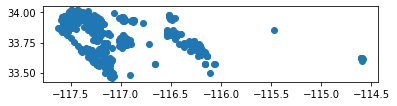

In [7]:
schools.plot()

In [8]:
# pip install git+https://github.com/martinfleis/geopandas-view.git

from geopandas_view import view

In [9]:
schools.head()

,NCESSCH,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
5576,060000710348,California School for the Deaf-Riverside,06,3044 Horace St.,Riverside,CA,92506,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0641,06061,06031,2017-2018,POINT (-117.37942 33.94373)
5727,060002702451,Tuscany Hills Elementary,06,23 Ponte Russo,Lake Elsinore,CA,92532,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.28897 33.68620)
5728,060002702452,Donald Graham Elementary,06,35450 Frederick St.,Wildomar,CA,92595,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.25699 33.60594)
5729,060002705011,David A. Brown Middle,06,21861 Grand Ave.,Wildomar,CA,92595,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.27617 33.59164)
5730,060002707605,William Collier Elementary,06,20150 Mayhall Dr.,Wildomar,CA,92595,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.30098 33.61655)


In [10]:
schools.shape

(511, 25)

<AxesSubplot:>

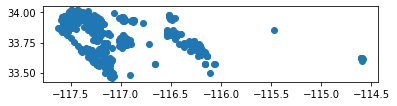

In [11]:
schools.plot()

In [12]:
schools.to_parquet('schools_1718.parquet')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [13]:
import geopandas as gpd

In [14]:
californiaschools = gpd.read_parquet('schools_1718.parquet')

<AxesSubplot:>

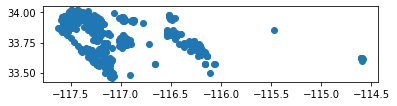

In [15]:
californiaschools.plot()

In [16]:
SEDA = pd.read_csv("https://stacks.stanford.edu/file/druid:db586ns4974/seda_cov_school_poolyr_4.0.csv")

In [17]:
SEDA.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perrl,perfrl,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall
0,10000500870,2009,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.066071,0.546429,0.547237,"Town, Fringe",NaN,NaN,NaN,NaN,NaN,280.0
1,10000500870,2010,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.073864,0.606061,0.588803,"Town, Distant",NaN,NaN,NaN,NaN,NaN,263.0
2,10000500870,2011,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.049296,0.647887,0.643357,"Town, Distant",NaN,NaN,NaN,NaN,NaN,284.0
3,10000500870,2012,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.082237,0.644737,0.641322,"Town, Distant",0.099836,0.08838,0.081833,0.0,0.0,303.5
4,10000500870,2013,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.057096,0.601958,0.633058,"Town, Distant",NaN,NaN,NaN,NaN,NaN,306.5


In [18]:
SEDA.shape

(746823, 31)

In [19]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
import contextily as ctx
import numpy as np
import quilt3
from geopandas_view import view

In [20]:
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("epa/ejscreen/ejscreen_2020.parquet", "NCES_Data_Folder/ejscreen_2020.parquet"),

100%|██████████| 146M/146M [00:04<00:00, 35.7MB/s] 


(None,)

In [21]:
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("epa/ejscreen/ejscreen_2020.parquet", "./ejscreen_2020.parquet"), 
ej = pd.read_parquet('ejscreen_2020.parquet')

ej


100%|██████████| 146M/146M [00:03<00:00, 37.8MB/s] 


,OBJECTID,ID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,1,010010201001,636,636,418,294,294,104,0.163522,245,...,36.8 ppb (15%ile),54%ile,9.69 ug/m3 (86%ile),52%ile,4259428.0,28435.0,0,0,13443.155206,6.040790e+06
1,2,010010201002,1287,1287,885,471,485,278,0.216006,210,...,36.8 ppb (15%ile),36%ile,9.69 ug/m3 (86%ile),28%ile,5558385.0,0.0,0,0,11917.089598,7.834160e+06
2,3,010010202001,810,802,568,322,370,548,0.676543,402,...,36.8 ppb (16%ile),70%ile,9.71 ug/m3 (86%ile),72%ile,2058380.0,0.0,0,0,7770.915121,2.900774e+06
3,4,010010202002,1218,1016,875,397,482,670,0.550082,400,...,36.8 ppb (16%ile),67%ile,9.71 ug/m3 (86%ile),69%ile,1267299.0,5669.0,0,0,6506.804784,1.793332e+06
4,5,010010203001,2641,2641,1849,948,1049,899,0.340401,814,...,36.9 ppb (16%ile),51%ile,9.75 ug/m3 (86%ile),48%ile,3866515.0,9054.0,0,0,11070.367848,5.461602e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,220329,721537506011,699,699,511,250,502,699,1.000000,631,...,None,None,None,None,7628406.0,4527.0,0,0,19751.958143,8.486394e+06
220329,220330,721537506012,2432,2432,1555,670,1025,2432,1.000000,1906,...,None,None,None,None,1569471.0,0.0,0,0,6704.079316,1.744950e+06
220330,220331,721537506013,976,976,552,231,416,976,1.000000,758,...,None,None,None,None,1789160.0,0.0,0,0,7737.485130,1.989274e+06
220331,220332,721537506021,1707,1689,1481,573,849,1707,1.000000,1465,...,None,None,None,None,1136084.0,1997.0,0,0,5128.437876,1.265271e+06


In [22]:
ej.rename(columns = {'ID' : 'GEOID'}, inplace = True)

ej

,OBJECTID,GEOID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,1,010010201001,636,636,418,294,294,104,0.163522,245,...,36.8 ppb (15%ile),54%ile,9.69 ug/m3 (86%ile),52%ile,4259428.0,28435.0,0,0,13443.155206,6.040790e+06
1,2,010010201002,1287,1287,885,471,485,278,0.216006,210,...,36.8 ppb (15%ile),36%ile,9.69 ug/m3 (86%ile),28%ile,5558385.0,0.0,0,0,11917.089598,7.834160e+06
2,3,010010202001,810,802,568,322,370,548,0.676543,402,...,36.8 ppb (16%ile),70%ile,9.71 ug/m3 (86%ile),72%ile,2058380.0,0.0,0,0,7770.915121,2.900774e+06
3,4,010010202002,1218,1016,875,397,482,670,0.550082,400,...,36.8 ppb (16%ile),67%ile,9.71 ug/m3 (86%ile),69%ile,1267299.0,5669.0,0,0,6506.804784,1.793332e+06
4,5,010010203001,2641,2641,1849,948,1049,899,0.340401,814,...,36.9 ppb (16%ile),51%ile,9.75 ug/m3 (86%ile),48%ile,3866515.0,9054.0,0,0,11070.367848,5.461602e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,220329,721537506011,699,699,511,250,502,699,1.000000,631,...,None,None,None,None,7628406.0,4527.0,0,0,19751.958143,8.486394e+06
220329,220330,721537506012,2432,2432,1555,670,1025,2432,1.000000,1906,...,None,None,None,None,1569471.0,0.0,0,0,6704.079316,1.744950e+06
220330,220331,721537506013,976,976,552,231,416,976,1.000000,758,...,None,None,None,None,1789160.0,0.0,0,0,7737.485130,1.989274e+06
220331,220332,721537506021,1707,1689,1481,573,849,1707,1.000000,1465,...,None,None,None,None,1136084.0,1997.0,0,0,5128.437876,1.265271e+06


In [23]:
geoms = gpd.read_parquet('s3://spatial-ucr/census/acs/acs_2018_bg.parquet')

geoms

,n_persons_under_18,n_persons_over_60,n_persons_over_75,n_persons_over_15,n_married,n_widowed_divorced,n_total_families,n_female_headed_families,n_nonhisp_white_persons,n_nonhisp_black_persons,...,p_female_headed_families,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_veterans,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
020130001003,287.0,213.0,26.0,1164.0,154.0,218.0,280.0,29.0,234.0,4.0,...,10.357143,16.846652,0.287977,6.839453,41.324694,23.182145,1.007919,23.182145,4.463643,"MULTIPOLYGON (((-159.91033 54.81417, -159.9057..."
020160001001,175.0,157.0,25.0,807.0,64.0,146.0,127.0,10.0,203.0,41.0,...,7.874016,20.949432,4.231166,11.764706,48.710010,9.907121,3.405573,9.907121,12.074303,"MULTIPOLYGON (((179.38874 51.94192, 179.40456 ..."
020160002001,320.0,224.0,21.0,1884.0,256.0,302.0,248.0,3.0,270.0,91.0,...,1.209677,12.517385,4.218822,12.888271,1.205378,66.759388,0.834492,66.759388,2.781641,"MULTIPOLYGON (((-167.24289 53.85467, -167.2370..."
020160002002,468.0,335.0,29.0,2220.0,304.0,435.0,341.0,6.0,916.0,114.0,...,1.759531,34.908537,4.344512,15.472561,5.182927,33.574695,3.696646,33.574695,3.620427,"MULTIPOLYGON (((-167.90386 53.22286, -167.8910..."
020200001011,75.0,79.0,37.0,404.0,49.0,73.0,63.0,0.0,351.0,4.0,...,0.000000,75.646552,0.862069,0.000000,12.715517,3.232759,0.000000,3.232759,9.482759,"MULTIPOLYGON (((-149.47075 61.45923, -149.4505..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560419753004,100.0,179.0,36.0,490.0,156.0,96.0,159.0,0.0,538.0,0.0,...,0.000000,94.885362,0.000000,1.940035,3.174603,0.000000,0.000000,0.000000,5.820106,"MULTIPOLYGON (((-110.95727 41.25777, -110.9572..."
560419753005,310.0,198.0,68.0,754.0,317.0,0.0,344.0,0.0,901.0,0.0,...,0.000000,89.562624,0.000000,8.747515,0.000000,0.000000,0.000000,0.000000,5.864811,"MULTIPOLYGON (((-110.98205 41.21578, -110.9816..."
560419753006,344.0,213.0,21.0,1049.0,263.0,205.0,307.0,49.0,1299.0,0.0,...,15.960912,98.933740,0.000000,0.685453,0.380807,0.000000,0.000000,0.000000,3.884235,"MULTIPOLYGON (((-111.04584 41.57985, -111.0454..."


In [24]:
ca_ej = ej[ej.GEOID.str.startswith('06')]

ca_ej

,OBJECTID,GEOID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
10297,10298,060014001001,3115,3105,2455,1297,1362,1060,0.340289,312,...,29.4 ppb (2%ile),24%ile,11.3 ug/m3 (94%ile),7%ile,6894340.0,0.0,0,0,18116.601501,1.108122e+07
10298,10299,060014002001,1037,1037,769,429,437,291,0.280617,81,...,28.5 ppb (2%ile),44%ile,11.3 ug/m3 (94%ile),28%ile,288071.0,0.0,0,0,3776.257571,4.627947e+05
10299,10300,060014002002,988,981,810,426,426,298,0.301619,149,...,28.5 ppb (2%ile),49%ile,11.3 ug/m3 (94%ile),37%ile,298490.0,0.0,0,0,4019.010837,4.794874e+05
10300,10301,060014003001,1137,1137,829,432,484,282,0.248021,41,...,28.3 ppb (2%ile),39%ile,11.2 ug/m3 (94%ile),20%ile,265695.0,0.0,0,0,3231.259100,4.267776e+05
10301,10302,060014003002,1404,1366,1175,771,785,378,0.269231,172,...,28.3 ppb (2%ile),41%ile,11.2 ug/m3 (94%ile),22%ile,269347.0,0.0,0,0,4482.836688,4.325698e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33504,33505,061150410005,503,503,343,247,321,96,0.190855,242,...,55.1 ppb (93%ile),57%ile,8.09 ug/m3 (34%ile),57%ile,149981083.0,967623.0,0,0,102608.401244,2.521725e+08
33505,33506,061150411001,821,821,728,446,618,101,0.123021,205,...,56.8 ppb (95%ile),36%ile,7.25 ug/m3 (16%ile),44%ile,298240467.0,16529900.0,0,0,152152.592535,5.291526e+08
33506,33507,061150411002,1422,1422,1116,713,918,403,0.283404,338,...,56.8 ppb (95%ile),37%ile,7.25 ug/m3 (16%ile),45%ile,94152563.0,550493.0,0,0,85751.913526,1.586637e+08
33507,33508,061150411003,1144,1144,806,502,634,156,0.136364,617,...,56.8 ppb (95%ile),56%ile,7.25 ug/m3 (16%ile),56%ile,84480721.0,0.0,0,0,61528.275564,1.417625e+08


In [25]:
riv_ej = ca_ej[ca_ej.GEOID.str.startswith("06065")]



In [26]:
riv_ej


,OBJECTID,GEOID,ACSTOTPOP,ACSIPOVBAS,ACSEDUCBAS,ACSTOTHH,ACSTOTHU,MINORPOP,MINORPCT,LOWINCOME,...,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
23264,23265,060650301011,1329,1323,697,360,360,1181,0.888638,617,...,71 ppb (99%ile),91%ile,12.3 ug/m3 (97%ile),88%ile,496238.0,0.0,0,0,3938.954918,7.237873e+05
23265,23266,060650301031,751,751,580,254,254,488,0.649800,355,...,70.5 ppb (99%ile),75%ile,12.4 ug/m3 (97%ile),73%ile,275562.0,0.0,0,0,2804.584445,4.018488e+05
23266,23267,060650301032,1477,1463,862,360,426,1077,0.729181,763,...,70.5 ppb (99%ile),90%ile,12.4 ug/m3 (97%ile),87%ile,727717.0,0.0,1,0,6393.157124,1.061330e+06
23267,23268,060650301041,2685,2685,1494,661,697,2259,0.841341,1049,...,70.9 ppb (99%ile),96%ile,12.4 ug/m3 (97%ile),94%ile,1383482.0,174839.0,0,0,7871.432274,2.273619e+06
23268,23269,060650301042,817,817,546,229,229,731,0.894737,310,...,70.9 ppb (99%ile),81%ile,12.4 ug/m3 (97%ile),78%ile,858394.0,0.0,0,0,5753.928230,1.252068e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24289,24290,060659414002,1791,1791,1237,840,1099,1016,0.567281,1070,...,64.2 ppb (98%ile),89%ile,7.72 ug/m3 (25%ile),80%ile,643394.0,0.0,0,0,3870.624900,9.345524e+05
24290,24291,060659414003,1196,1098,969,658,1002,498,0.416388,560,...,64.2 ppb (98%ile),71%ile,7.72 ug/m3 (25%ile),67%ile,643876.0,0.0,0,2,3866.103860,9.352528e+05
24291,24292,060659415001,5130,5130,3103,1460,1582,2968,0.578558,1685,...,65.6 ppb (99%ile),92%ile,8.67 ug/m3 (54%ile),85%ile,40126542.0,822800.0,0,0,35333.859585,5.942124e+07
24292,24293,060659800041,0,0,0,0,0,0,0.000000,0,...,70.1 ppb (99%ile),58%ile,11.9 ug/m3 (96%ile),58%ile,5735200.0,0.0,0,0,20163.132730,8.353172e+06


In [27]:
riv_ej.shape

(1030, 141)

In [28]:
riv_ej.shape

(1030, 141)

In [29]:
riv_ej.shape

(1030, 141)

In [30]:
districts = gpd.read_parquet('s3://spatial-ucr/nces/districts/school_districts_1819.parquet')

In [31]:
rusd = districts[districts['NAME'].str.lower().str.contains('riverside unified')]

rusd

,STATEFP,ELSDLEA,SCSDLEA,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
1598,06,None,None,33150,0633150,Riverside Unified School District,00,KG,12,G5420,None,E,231195333.0,6617991.0,+33.9233125,-117.3778383,2019,2018-2019,"POLYGON ((-117.27942 34.00459, -117.27923 33.9..."
2344,20,None,None,00351,2000351,Riverside Unified School District 114,00,PK,12,G5420,None,E,217731318.0,7155066.0,+39.7879488,-094.9733667,2019,2018-2019,"POLYGON ((-94.87656 39.82088, -94.87654 39.820..."


In [32]:
view(rusd, tooltip=True)

In [33]:
schools.head()

,NCESSCH,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
5576,060000710348,California School for the Deaf-Riverside,06,3044 Horace St.,Riverside,CA,92506,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0641,06061,06031,2017-2018,POINT (-117.37942 33.94373)
5727,060002702451,Tuscany Hills Elementary,06,23 Ponte Russo,Lake Elsinore,CA,92532,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.28897 33.68620)
5728,060002702452,Donald Graham Elementary,06,35450 Frederick St.,Wildomar,CA,92595,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.25699 33.60594)
5729,060002705011,David A. Brown Middle,06,21861 Grand Ave.,Wildomar,CA,92595,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.27617 33.59164)
5730,060002707605,William Collier Elementary,06,20150 Mayhall Dr.,Wildomar,CA,92595,06,06065,Riverside County,...,1,348,"Los Angeles-Long Beach, CA",N,N,0642,06067,06028,2017-2018,POINT (-117.30098 33.61655)


In [34]:
seda = pd.read_csv("https://stacks.stanford.edu/file/druid:db586ns4974/seda_school_pool_gcs_4.0.csv",converters={"sedasch":str})
seda.sedasch=seda.sedasch.str.rjust(12, "0")

seda.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_ol_se,gcs_mn_mth_ol_se,gcs_mn_avg_eb,gcs_mn_coh_eb,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se
0,010000201667,Camps,1,AL,all,all,7.5,0,13,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,010000201670,Det Ctr,1,AL,all,all,7.5,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,010000201705,Wallace Sch - Mt Meigs Campus,1,AL,all,all,7.0,0,98,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010000201706,McNeel Sch - Vacca Campus,1,AL,all,all,7.0,0,118,12,...,NaN,NaN,2.632403,NaN,NaN,NaN,0.469368,NaN,NaN,NaN
4,010000500870,Albertville Middle School,1,AL,all,all,7.5,0,12520,39,...,NaN,0.16536,6.363105,-0.026981,NaN,-0.256272,0.082592,0.027416,NaN,0.155361


In [35]:
school_geoms = schools[['NCESSCH','CNTY','NMCNTY', 'geometry']]
school_geoms.head()

,NCESSCH,CNTY,NMCNTY,geometry
5576,060000710348,06065,Riverside County,POINT (-117.37942 33.94373)
5727,060002702451,06065,Riverside County,POINT (-117.28897 33.68620)
5728,060002702452,06065,Riverside County,POINT (-117.25699 33.60594)
5729,060002705011,06065,Riverside County,POINT (-117.27617 33.59164)
5730,060002707605,06065,Riverside County,POINT (-117.30098 33.61655)


In [36]:
seda_merge = seda.merge(school_geoms, left_on="sedasch", right_on= "NCESSCH")
seda_merge.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se,NCESSCH,CNTY,NMCNTY,geometry
0,060002702451,Tuscany Hills Elementary,6,CA,all,all,4.0,0,6622,54,...,0.966089,-0.456324,0.077796,0.025330,0.086952,0.147377,060002702451,06065,Riverside County,POINT (-117.28897 33.68620)
1,060002702452,Donald Graham Elementary,6,CA,all,all,4.5,0,4450,52,...,0.851025,-0.155221,0.086146,0.026827,0.079418,0.153178,060002702452,06065,Riverside County,POINT (-117.25699 33.60594)
2,060002705011,David A. Brown Middle,6,CA,all,all,7.0,0,14011,44,...,0.912412,-0.581169,0.081987,0.025659,0.084094,0.156177,060002705011,06065,Riverside County,POINT (-117.27617 33.59164)
3,060002707605,William Collier Elementary,6,CA,all,all,4.0,0,5382,54,...,0.688857,-0.310582,0.076521,0.024574,0.086437,0.145329,060002707605,06065,Riverside County,POINT (-117.30098 33.61655)
4,060002709490,Elsinore Elementary,6,CA,all,all,4.0,0,4931,54,...,0.838429,-0.423913,0.080091,0.025679,0.089638,0.151112,060002709490,06065,Riverside County,POINT (-117.33232 33.67245)


<AxesSubplot:>

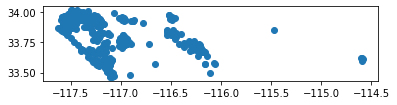

In [37]:
seda_merge= gpd.GeoDataFrame(seda_merge)
seda_merge.plot()

<AxesSubplot:>

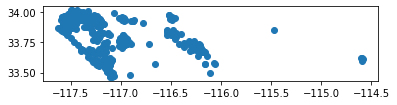

In [38]:
riv_schools = seda_merge[seda_merge['CNTY']=='06065']

riv_schools.plot()